In [4]:
from __future__ import division
import numpy as np
from scipy.integrate import odeint

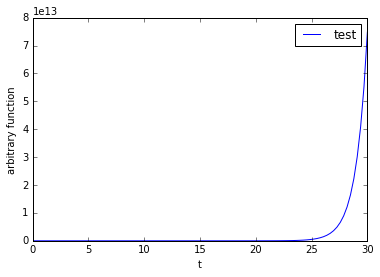

In [11]:
def test_torque(t):
    return t*2

def test_model(y, t):
    dy = y[0] + test_torque(t)
    return [dy]

t = np.linspace(0.0, 30.0, 100)
y_init = np.array([5.0])
y = odeint(test_model, y_init, t)

plot.plot(t, y[:,0], label="test")
plot.xlabel("t")
plot.ylabel("arbitrary function")
plot.legend()
plot.show()

In [12]:
# CONSTANTS
wheel_radius = 0.13 # m 
mag_mass = 0.1133981 # kg - home depot reference
cart_mass = 0.175 - mag_mass # kg
spring_const = # N/m => kg/s^2
inertial_mass = # (is this moment of inertia)
pin_dist = 0.1 # m - distance from center of wheel to rigid arm pin
ra_length = 0.28 # m - length of the rigid arm
rail_height = 0.055 # m - vertical distance from the rail to the center of the wheel

uncompressed_spring_length = 0.05 # m

# MMF specifics
u0 = 4*np.pi*10**-7 # permeability of free space
mag_length = 0.047 # m 
mag_width = 0.022 # m
mag_height = 0.011 # m
mag_radius = mag_height/2 # m - halved height; decide whether this is appropriate
pole_area = 0.047 * 0.022 # m^2
mag2_dist = # m - horizontal distance from center of wheel to second magnet (initial); this can be manipulated


# INPUT FUNCTIONS
def input_torque(t):
    """
        input torque as a function of time.
    
        Parameters
        ----------
        t : {numpy array}
            timeseries with appropriate range
    """
    # TODO : define an equation for the input torque
    
    return 1.0

def mag_force(theta):
    """
        repelling force as a function of distance between the two magnets.
        distance between magnets is function of theta.
        
        Parameters
        ----------
        theta : {numpy.array}
    """
    # compute L - distance from the center of the wheel to the magnet
    center_dist = pin_dist * np.cos(theta) + \
        np.sqrt(ra_length**2 - (rail_height + pin_dist * np.sin(theta)))
        
    # separation between magnets
    sep = mag2_dist - center_dist
        
    # TODO: compute magnetomotive force
    
    # store intermediary caclculations for b0 - cleanliness
    inter = [mag_length*mag_width, mag_length**2, mag_width**2, mag_height + sep]
    
    # magnetic flux density calculation - function of separation
    # need to obtain Br (remenance field val)
    b0 = br/np.pi * (np.arctan(inter[0]/(2*sep*np.sqrt(4*sep**2 + inter[1] + inter[2]))) - \
                     np.arctan(inter[0]/(2*inter[3]*np.sqrt(4*inter[3]**2 + inter[1] + inter[2]))))
    
    # magnetomotive force - assumes cylindrical bar magnets
    force = ((b0**2 * pole_area**2 * (mag_length**2 + mag_radius**2))/(np.pi*perm * mag_length**2)) * \
        (1/sep**2 + 1/(sep + 2*mag_length)**2 - 2/(sep + mag_length)**2)
    
    return force

# SIMULATION
def model_1(y, t):
    """
        generate series of RHS equations from system 1 to be passed
        into solver.
        
        Parameters
        ----------
        y : {numpy.array}
            initial conditions for system
        
        t : {numpy.array}
            timeseries with appropriate range
    """
    p2 = y[0]
    
    dp2 = input_torque(t) / (1 + (R**2)*mag1_mass/intertial_mass)
    dtheta = p2/inertial_mass
    
    return [dp2, dtheta]
    
def model_2(y, t):
    """
        generate series of RHS equations from system 2 to be passed
        into solver.

        Parameters
        ----------
        y : {numpy.array}
            initial conditions for system

        t : {numpy.array}
            timeseries with appropriate range
    """
    q8 = y[0]
    p7 = y[1]
    theta = y[2]
    
    dp7 = (mag_force(theta) * q8/spring_const)/(1 + mag2_mass/cart_mass)
    dq8 = p7/cart_mass

    return [dp7, dq8]

# initial conditions
p2_0 = # angular momentum (2)
q8_0 = 0.0 # spring displacement (8)
p7_0 = 0.0 # momentum (7)

time = np.linspace(0.0, 30.0, 100) # 100 points between 0 and 30 seconds

"""
    We compute angular momentum and theta first as we've split the two
    systems and because the magnetomotive repelling force is a function
    of theta.
"""
y_init_1 = np.array([p2_0])

# angular momentum and theta
y1 = odeint(model_1, y_init_1, time)

p2 = y1[:,0]

theta = y1[:,1]

y_init_2 = np.array([q8_0, p7_0, theta])

# spring displacement and cart momentum
y2 = odeint(model_2, y_init_2, time)

# TODO: PLOT

SyntaxError: invalid syntax (<ipython-input-12-28f152b1e7a6>, line 4)